In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
import os

from imutils.object_detection import non_max_suppression

In [2]:
# Canny image parameter
low_threshold = 100
high_threshold = 200

# Use equation as a template 
image1 = cv2.imread('testImages/testImage1.jpg')
image2 = cv2.imread('testImages/testImage2.jpg')
template1 = cv2.imread('testImages/class_a/e1.jpg')
template2 = cv2.imread('testImages/class_a/equ1.jpg')
template3 = cv2.imread('testImages/class_a/equ31.jpg')
template4 = cv2.resize(template2, (800, 250))
template5 = cv2.resize(template2, (300, 100))
template6 = cv2.resize(template1, (300, 100))
template7 = cv2.resize(template3, (300, 100))

# Select template
template = template4
templateGrey = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
templateCanny = cv2.Canny(templateGrey, low_threshold, high_threshold)

# Select image
image = image1
imageGrey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
imageCanny = cv2.Canny(imageGrey, low_threshold, high_threshold)


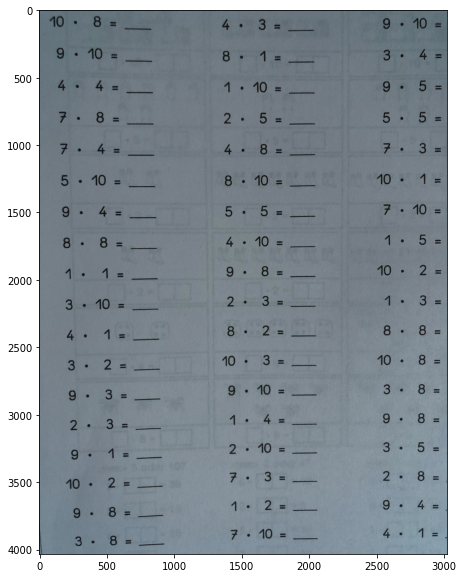

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(image)

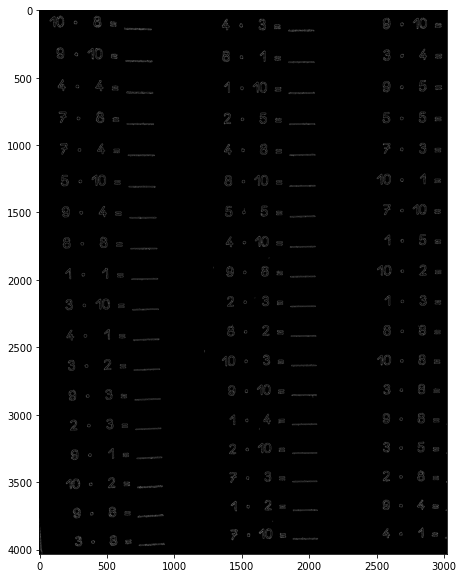

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(imageCanny, cmap='gray')

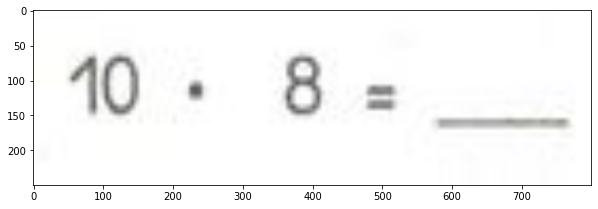

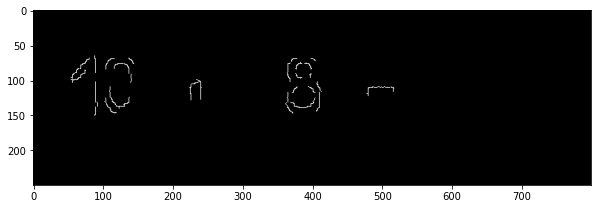

In [5]:

plt.figure(figsize=(10,10))
plt.imshow(template)

plt.figure(figsize=(10,10))
plt.imshow(templateCanny, cmap='gray')



In [6]:
# Apply template matching algorithm in cv2
#match = cv2.matchTemplate(image=imageGrey, templ=templateGrey, method=cv2.TM_CCOEFF_NORMED)
match = cv2.matchTemplate(image=imageCanny, templ=templateCanny, method=cv2.TM_CCOEFF_NORMED)



In [7]:
# Filter the found matches against a threshold 
thresh = 0.05
H, W = template.shape[:2]

# Select rectangles with
# confidence greater than threshold
(y_points, x_points) = np.where(match >= thresh)

# initialize our list of bounding boxes
boxes = list()

# store coordinates of each bounding box
for (x, y) in zip(x_points, y_points):
    boxes.append((x, y, x + W, y + H))



In [8]:
print(len(boxes))

11762


In [9]:
# apply non-maxima suppression to the rectangles
# this will create a single bounding box
boxes = non_max_suppression(np.array(boxes))
  
# loop over the final bounding boxes
for (x1, y1, x2, y2) in boxes:
    
    # draw the bounding box on the image
    cv2.rectangle(image, (x1, y1), (x2, y2),
                  (255, 0, 0), 3)

In [10]:
print(len(boxes))

49


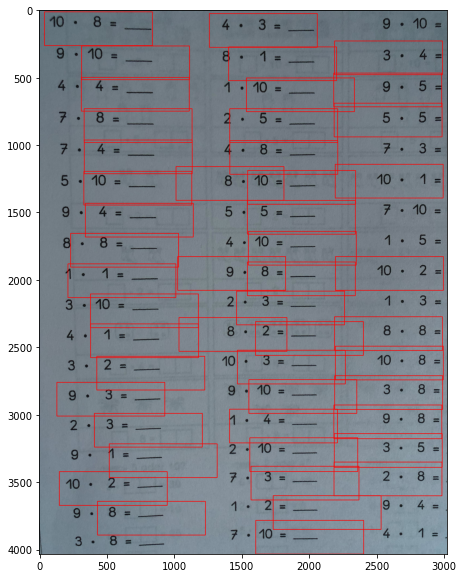

In [11]:
# Show the template and the final output
plt.figure(figsize=(10,10))
plt.imshow(image)


In [12]:
# Run NoEquation Detector on it in order to filter out the FPs
# Run multiple templates and implement reduncancy logic 
# The template size seems to be crucial! Maybe one can use a clustering approach in order to AUTOMATICALLY identify a reasonable template size
# Use domain knowledge about the fact that equations are usually structered, i.e. horizontally and vertically alligned